In [17]:
#@python 3.8.10
#@author moon ying
#plot continuum membrane results with matplotlib 3d plot and trimesh package
#dependencies are listed as follows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import trimesh as tr
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import seaborn as sns
sns.set_context("talk")

import pyvista as pv
import vtk
from pyvistaqt import BackgroundPlotter

# use one of...
from pykdtree.kdtree import KDTree
# from scipy.spatial import cKDTree as KDTree

In [18]:
infile = "vertex_begin.csv"
trangulationfile = "face.csv"
outfile = "392"

In [19]:
vertices = pd.read_csv(infile, header = None)
vertices.columns = ["x","y","z"]
vertices

,x,y,z
0,-49,-50.229473,9.045477
1,-47,-50.229473,9.045477
2,-45,-50.229473,9.045477
3,-43,-50.229473,9.045477
4,-41,-50.229473,9.045477
...,...,...,...
3004,43,50.229473,9.045477
3005,45,50.229473,9.045477
3006,47,50.229473,9.045477
3007,49,50.229473,9.045477


In [20]:
df_faces = pd.read_csv(trangulationfile, header = None)
faces = df_faces.to_numpy()
#faces.columns = ["x","y","z"]
faces

array([[  51,   52,    0],
       [  52,    1,    0],
       [  52,   53,    1],
       ...,
       [3006, 3007, 2956],
       [2956, 3007, 2957],
       [3007, 3008, 2957]])

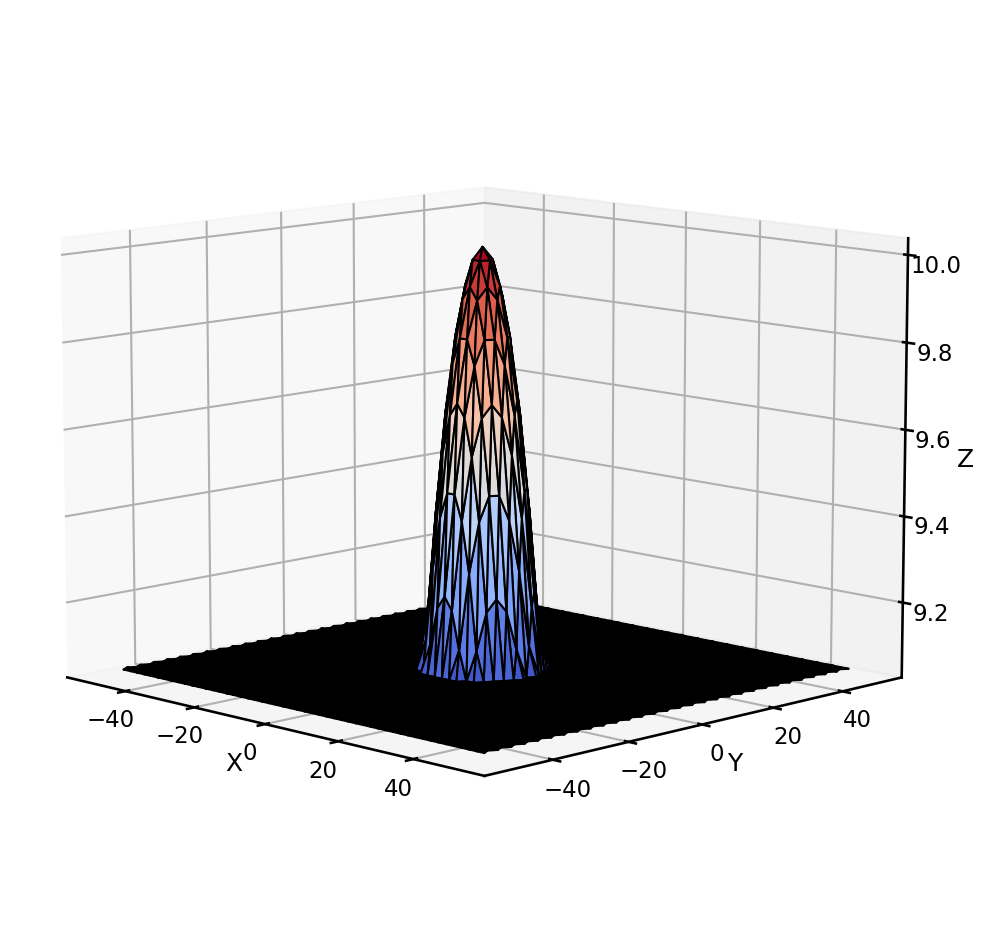

In [21]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection='3d')

#ax.scatter3D(vertices["x"], vertices["y"], vertices["z"], c = vertices["z"], s = 16.0);

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_trisurf(vertices["x"], vertices["y"], vertices["z"],
                       triangles=faces, cmap=cm.coolwarm,
                       edgecolor = "k")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



ax.view_init(elev = 10, azim = -45)
plt.savefig(outfile + "gagsonly_10deg_with_axis.png", dpi = 300)

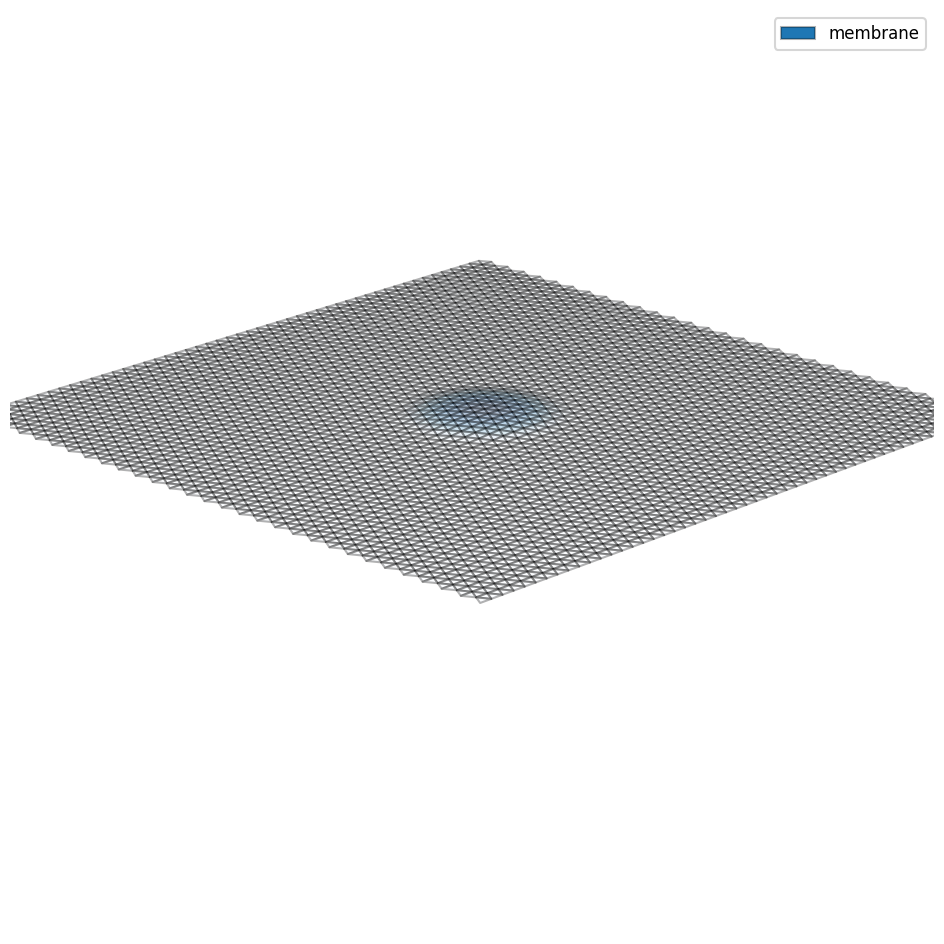

In [22]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection='3d')


#ax.scatter3D(vertices["x"], vertices["y"], vertices["z"], c = vertices["z"], s = 16.0);

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
#surf_gags = ax.plot_trisurf(gags["x"], gags["y"], gags["z"], cmap="Oranges")
surf_vertices = ax.plot_trisurf(vertices["x"], vertices["y"], vertices["z"], triangles = faces, \
                               cmap = "Blues", alpha = 0.3, edgecolor="k", label = "membrane")
# https://stackoverflow.com/questions/54994600/pyplot-legend-poly3dcollection-object-has-no-attribute-edgecolors2d
surf_vertices._facecolors2d=surf_vertices._facecolors
surf_vertices._edgecolors2d=surf_vertices._edgecolors


ax.set_xlim3d(-40.0, 40.0)
ax.set_ylim3d(-40.0, 40.0)
ax.set_zlim3d(-40.0, 40.0)
ax.set_axis_off()
ax.legend(prop={'size': 12})
ax.view_init(elev = 20, azim = 45)

#plt.savefig(outfile + "membrane_10deg_uniform_scale.png", dpi = 300)

In [23]:
# VTK requires mesh faces info stores as [num_vertices, vertex1, vertex2, ...]
df_faces.insert(0, 'num', 3)
vtk_faces = df_faces.to_numpy()
vtk_faces

array([[   3,   51,   52,    0],
       [   3,   52,    1,    0],
       [   3,   52,   53,    1],
       ...,
       [   3, 3006, 3007, 2956],
       [   3, 2956, 3007, 2957],
       [   3, 3007, 3008, 2957]])

In [24]:
subdiv_times = 4
subfilter = "loop"

arr_x = vertices["x"].to_numpy()
arr_y = vertices["y"].to_numpy()
arr_z = vertices["z"].to_numpy()

npdat = np.transpose(np.array([arr_x, arr_y, arr_z]))

# Convert the numpy array into a pyvista mesh object
mesh = pv.PolyData(npdat, vtk_faces)

# Subdivide with pyvista module
# currently `subfilter` field supports three schemes: linear, loop, butterfly
meshsub = mesh.subdivide(subdiv_times, subfilter=subfilter)
meshsub


PolyData,Information
N Cells,1484800
N Points,744129
N Strips,0
X Bounds,"-4.967e+01, 5.067e+01"
Y Bounds,"-5.023e+01, 5.023e+01"
Z Bounds,"9.045e+00, 1.000e+01"
N Arrays,0


In [25]:
vertices_subdiv = meshsub.points.T
vertices_subdiv

pyvista_ndarray([[-48.833984, -47.      , -45.      , ...,  50.046387,
                   50.001343,  49.931763],
                 [-49.941925, -50.229473, -50.229473, ...,  49.67341 ,
                   49.571495,  49.67975 ],
                 [  9.045477,   9.045477,   9.045477, ...,   9.045477,
                    9.045477,   9.045477]], dtype=float32)

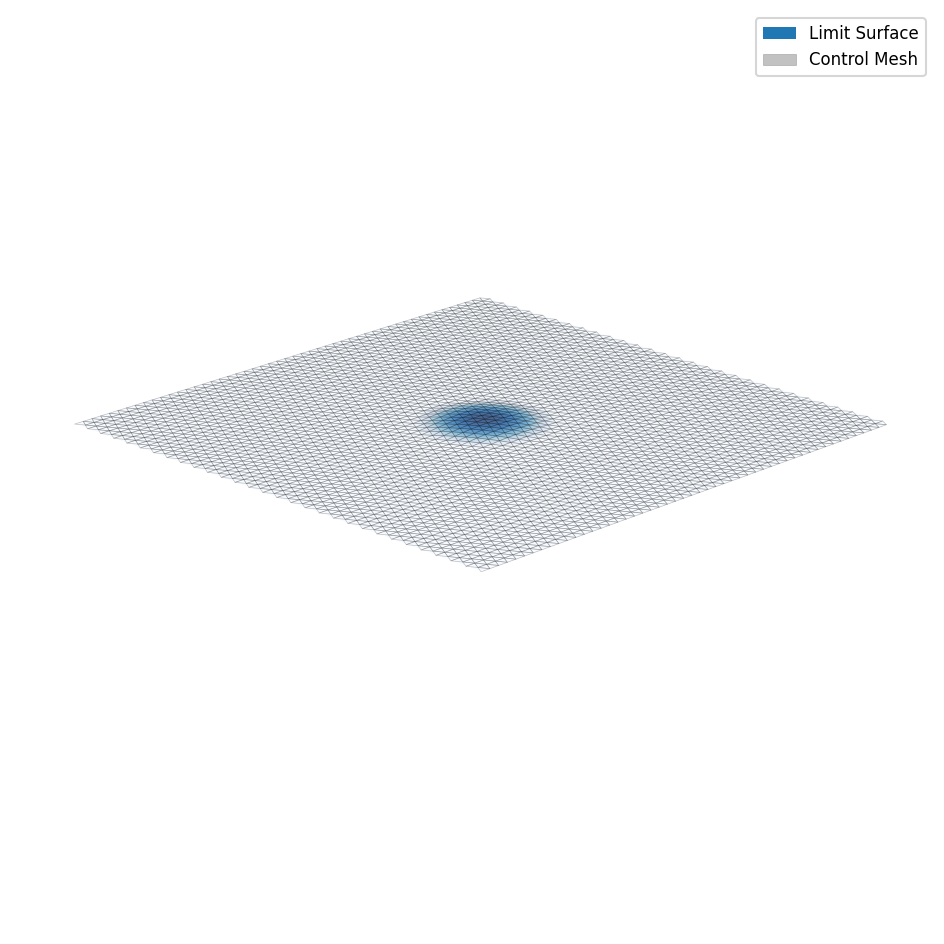

In [26]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection='3d')


#ax.scatter3D(vertices["x"], vertices["y"], vertices["z"], c = vertices["z"], s = 16.0);

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})



surf_subdiv = ax.plot_trisurf(vertices_subdiv[0], \
                                vertices_subdiv[1],
                                vertices_subdiv[2], \
                               cmap = "Blues", alpha = 1.0, edgecolor="none", label = "Limit Surface")
# https://stackoverflow.com/questions/54994600/pyplot-legend-poly3dcollection-object-has-no-attribute-edgecolors2d
surf_subdiv._facecolors2d=surf_subdiv._facecolors
surf_subdiv._edgecolors2d=surf_subdiv._edgecolors

# Plot the surface.
#surf_gags = ax.plot_trisurf(gags["x"], gags["y"], gags["z"], cmap="Oranges")
surf_vertices = ax.plot_trisurf(vertices["x"], vertices["y"], vertices["z"], triangles = faces, \
                               cmap = "Blues", alpha = 0.24, linewidth = 0.5, edgecolor="k", label = "Control Mesh")
surf_vertices._facecolors2d=surf_vertices._edgecolors
surf_vertices._edgecolors2d=surf_vertices._edgecolors


ax.set_xlim3d(-50.0, 50.0)
ax.set_ylim3d(-50.0, 50.0)
ax.set_zlim3d(-50.0, 50.0)
ax.set_axis_off()
ax.legend(prop={'size': 12})
ax.view_init(elev = 20, azim = 45)

plt.savefig(outfile + "ls_cm_20deg_uniform_scale.png", dpi = 900)

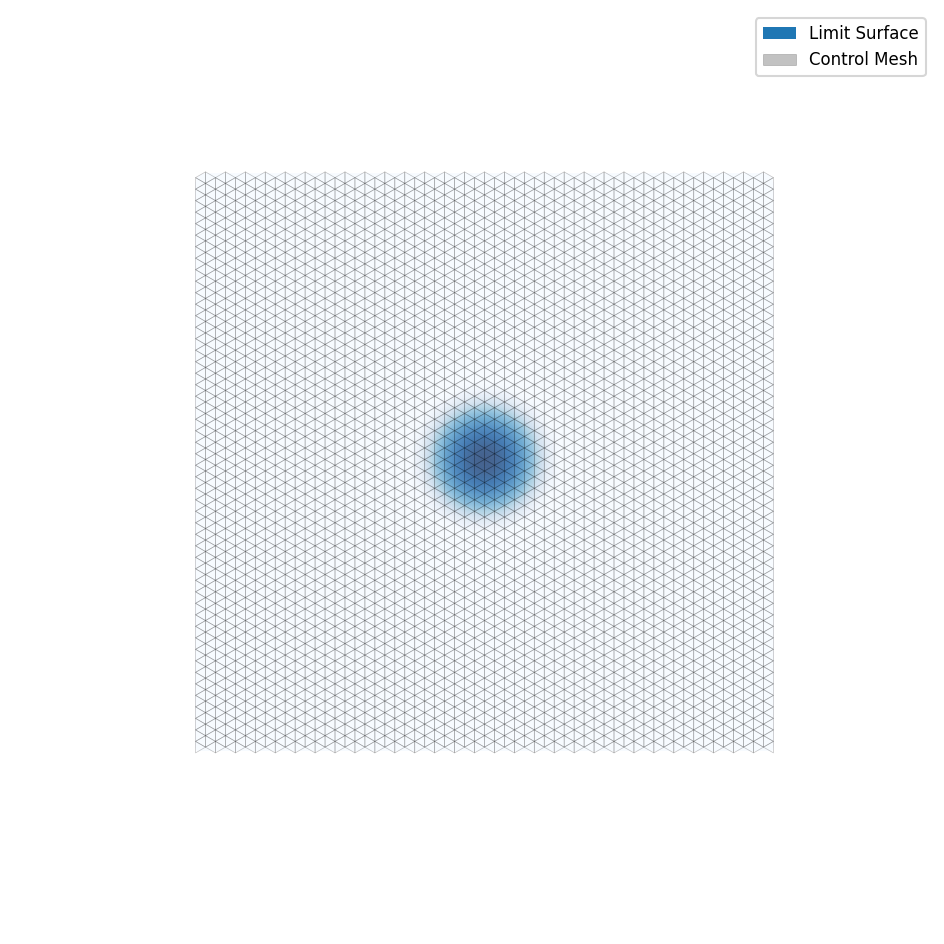

In [27]:
fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection='3d')


#ax.scatter3D(vertices["x"], vertices["y"], vertices["z"], c = vertices["z"], s = 16.0);

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})



surf_subdiv = ax.plot_trisurf(vertices_subdiv[0], \
                                vertices_subdiv[1],
                                vertices_subdiv[2], \
                               cmap = "Blues", alpha = 1.0, edgecolor="none", label = "Limit Surface")
# https://stackoverflow.com/questions/54994600/pyplot-legend-poly3dcollection-object-has-no-attribute-edgecolors2d
surf_subdiv._facecolors2d=surf_subdiv._facecolors
surf_subdiv._edgecolors2d=surf_subdiv._edgecolors

# Plot the surface.
#surf_gags = ax.plot_trisurf(gags["x"], gags["y"], gags["z"], cmap="Oranges")
surf_vertices = ax.plot_trisurf(vertices["x"], vertices["y"], vertices["z"], triangles = faces, \
                               cmap = "Blues", alpha = 0.24, linewidth = 0.5, edgecolor="k", label = "Control Mesh")
surf_vertices._facecolors2d=surf_vertices._edgecolors
surf_vertices._edgecolors2d=surf_vertices._edgecolors


ax.set_xlim3d(-50.0, 50.0)
ax.set_ylim3d(-50.0, 50.0)
ax.set_zlim3d(-50.0, 50.0)
ax.set_axis_off()
ax.legend(prop={'size': 12})
ax.view_init(elev = 90, azim = 0)

plt.savefig(outfile + "ls_cm_90deg_uniform_scale.png", dpi = 900)

/home/local/WIN/yying7/.local/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


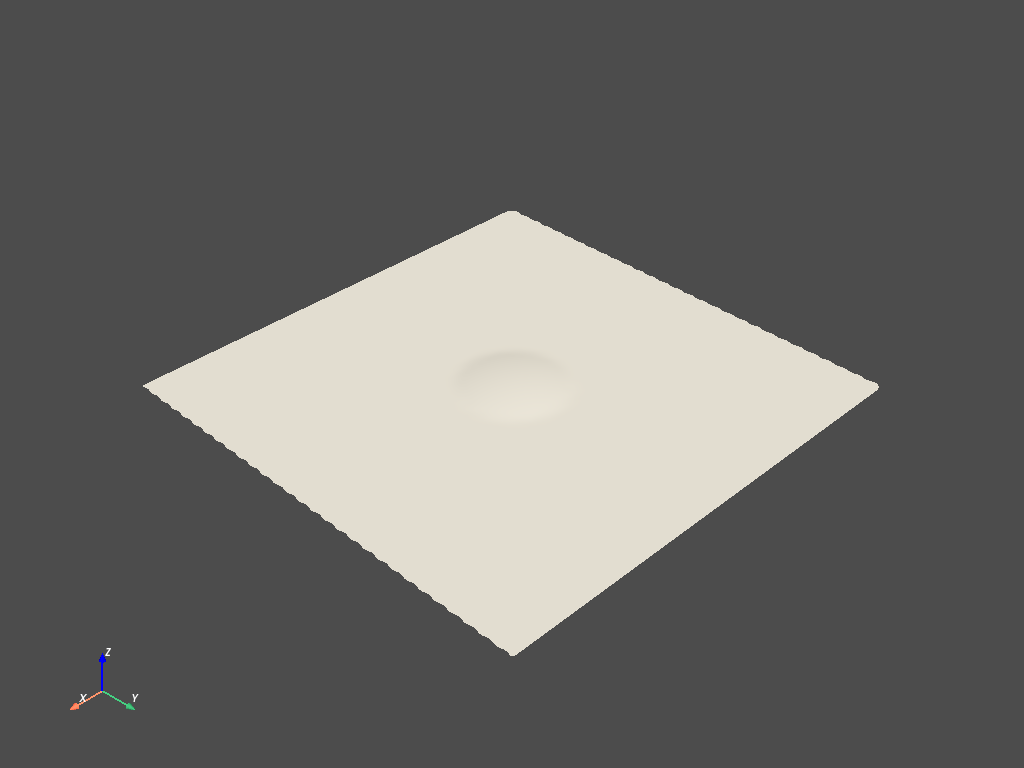

AttributeError: 'NoneType' object has no attribute 'show_axes'

In [28]:
# Plot the PolyData with PyVista
plotter = pv.plot(meshsub)

# Get the Matplotlib axes from the PyVista plotter
mpl_axes = plotter.show_axes()

# Customize the PyVista plot if needed
# plotter.add_mesh(...) or other PyVista plotting functions

# Create a Matplotlib plot using the same axes
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': '3d'}, num='My Overlayed Plot')
ax.axis('off')  # Turn off axes if needed

# Your Matplotlib plotting code goes here
# For example:
# ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 0, 0], color='red', linewidth=2)
# Plot the surface.
#surf_gags = ax.plot_trisurf(gags["x"], gags["y"], gags["z"], cmap="Oranges")
surf_vertices = ax.plot_trisurf(vertices["x"], vertices["y"], vertices["z"], triangles = faces, \
                               cmap = "Blues", alpha = 0.3, edgecolor="k", label = "membrane")
# https://stackoverflow.com/questions/54994600/pyplot-legend-poly3dcollection-object-has-no-attribute-edgecolors2d
surf_vertices._facecolors2d=surf_vertices._facecolors
surf_vertices._edgecolors2d=surf_vertices._edgecolors


# Show the Matplotlib plot
plt.show()


Energy and Force
==

In [ ]:
df_ef = pd.read_csv("EnergyForce.csv", index_col = False, header = None, skiprows = 1)
df_ef.columns = ["E_curv", "E_area", "E_reg", "E_tot", "F_mean"]
df_ef

,E_curv,E_area,E_reg,E_tot,F_mean
0,0.000,0,0.000,0.000,-nan
1,0.000,0,0.000,0.000,-nan
2,102.466,0,62.600,165.066,-nan
3,136.823,0,192.709,329.533,-nan
4,184.595,0,174.676,359.272,-nan
...,...,...,...,...,...
996,268.128,0,715.173,983.301,-nan
997,410.959,0,846.175,1257.130,-nan
998,183.457,0,745.308,928.765,-nan
999,193.105,0,683.660,876.764,-nan


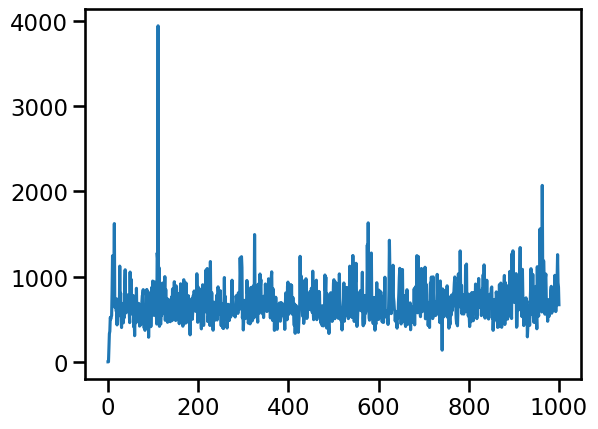

In [ ]:
plt.plot(df_ef["E_tot"])

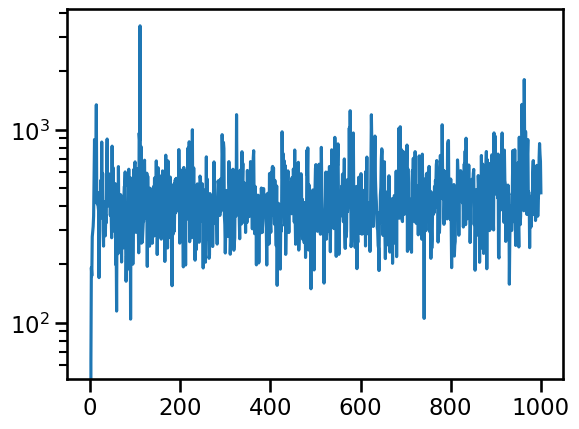

In [ ]:
plt.yscale("log")
plt.plot(df_ef["E_reg"])

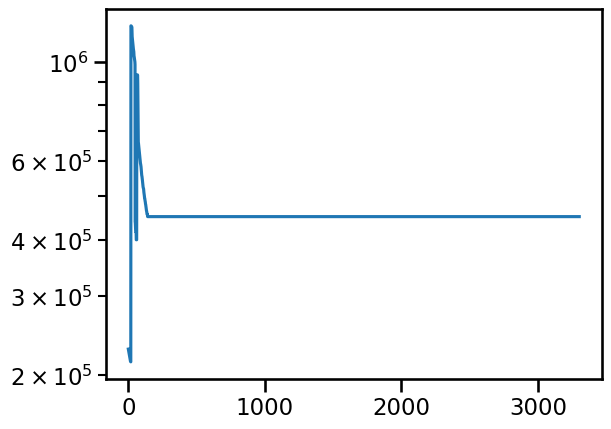

In [ ]:
plt.yscale("log")
plt.plot(df_ef["E_tot"])

In [ ]:
gags_r

,x,y,z
0,-0.867424,7.598480,54.4132
1,-0.783731,1.557200,55.0868
2,1.578890,0.481972,55.0774
3,3.687040,1.983030,54.8719
4,-1.526040,-1.171580,55.1418
...,...,...,...
387,11.009100,29.180900,43.3027
388,-28.127100,19.967400,41.3317
389,27.386500,-19.421200,42.1758
390,32.937500,-3.307260,42.0859
